In [69]:
# imports
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

In [2]:
# add paths and import scripts
sys.path.append('.')
sys.path.append('..')
sys.path.insert(1,'../scripts')
from dataCleaner import *
from dataVisualizer import *

In [3]:
# read the dataset
df = pd.read_csv('../data/Week1_challenge_data_source_filled.csv.bz2')
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,total_youtube,total_netflix,total_social,total_other,fixed_dur,fixed_activity_dur_dl,fixed_activity_dur_ul,fixed_total_ul,total_data,decile
0,1.311450e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,86399.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,18355943.0,17855187.0,1570185.0,180558843.0,86399.0,37624.0,38787.0,36749741.0,345629377.0,"(72290.0, 86399.0]"
1,1.311450e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,86399.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,39359124.0,35565545.0,1933278.0,541959383.0,86399.0,168.0,3560.0,53800391.0,707185356.0,"(72290.0, 86399.0]"
2,1.311450e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,86399.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,34425237.0,23751202.0,1726277.0,414908351.0,86399.0,0.0,0.0,27883638.0,307690973.0,"(72290.0, 86399.0]"
3,1.311450e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,86399.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,36534765.0,15092588.0,657493.0,761837216.0,86399.0,3330.0,37882.0,43324218.0,889352748.0,"(72290.0, 86399.0]"
4,1.311450e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,86399.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,34222253.0,17539799.0,912788.0,564619822.0,86399.0,0.0,0.0,38542814.0,607681403.0,"(72290.0, 86399.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304240e+19,2019-04-29 07:28:00,615.0,2019-04-30 00:01:00,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,T85721A,...,24553645.0,29618711.0,993175.0,336273648.0,59587.0,3380381.0,2355730.0,53745392.0,872761860.0,"(45959.8, 72290.0]"
149996,7.277830e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,27955095.0,37561864.0,3517065.0,16751926.0,81230.0,42376.0,41915.0,57628851.0,631804110.0,"(72290.0, 86399.0]"
149997,7.349880e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,22165518.0,40643294.0,2352181.0,714638145.0,97970.0,17264.0,16759.0,39135081.0,705783925.0,"(86400.0, 101468.0]"
149998,1.311450e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,24516413.0,15029702.0,1260239.0,132415585.0,98249.0,25003.0,28640.0,34912224.0,627698629.0,"(86400.0, 101468.0]"


In [4]:
cleaner = dataCleaner(df)
visualizer = dataVisualizer()

Data cleaner in action.
Data visualizer in action.


# User experience analysis

### Aggregate, per customer, the following information

In [12]:
# defining the user experience data frame
user_experience_df = df[['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']]
user_experience_df

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,3.366496e+10,568730.0,20949.5,42.0,5.0,Samsung Galaxy A5 Sm-A520F,23.0,44.0
1,3.368185e+10,568730.0,20949.5,65.0,5.0,Samsung Galaxy J5 (Sm-J530),16.0,26.0
2,3.376063e+10,568730.0,20949.5,45.0,5.0,Samsung Galaxy A8 (2018),6.0,9.0
3,3.375034e+10,568730.0,20949.5,45.0,5.0,Huawei B528S-23A,44.0,44.0
4,3.369980e+10,568730.0,20949.5,45.0,5.0,Samsung Sm-G390F,6.0,9.0
...,...,...,...,...,...,...,...,...
149995,3.366865e+10,16552848.0,162614.0,313.0,9.0,Huawei B528S-23A,63420.0,1393.0
149996,3.365069e+10,568730.0,20949.5,32.0,0.0,Apple iPhone 8 Plus (A1897),52.0,65.0
149997,3.366345e+10,568730.0,20949.5,27.0,2.0,Apple iPhone Se (A1723),23.0,54.0
149998,3.362189e+10,568730.0,20949.5,43.0,6.0,Apple iPhone Xs (A2097),43.0,47.0


* Average TCP retransmission

In [24]:
print(f"Average TCP download retransmission per user\n {user_experience_df.groupby('MSISDN/Number').agg('TCP DL Retrans. Vol (Bytes)').mean()}")
print(f"\nAverage TCP upload retransmission per user\n {user_experience_df.groupby('MSISDN/Number').agg('TCP UL Retrans. Vol (Bytes)').mean()}")

Average TCP download retransmission per user
 MSISDN/Number
3.360100e+10     568730.0
3.360100e+10     568730.0
3.360100e+10     568730.0
3.360101e+10       1066.0
3.360101e+10    4959180.0
                  ...    
3.379000e+10     215044.0
3.379000e+10     568730.0
3.197020e+12     568730.0
3.370000e+14     568730.0
8.823970e+14     568730.0
Name: TCP DL Retrans. Vol (Bytes), Length: 106856, dtype: float64

Average TCP upload retransmission per user
 MSISDN/Number
3.360100e+10    20949.50
3.360100e+10    20949.50
3.360100e+10    20949.50
3.360101e+10    20949.50
3.360101e+10    21075.75
                  ...   
3.379000e+10     3001.00
3.379000e+10    20949.50
3.197020e+12    20949.50
3.370000e+14    20949.50
8.823970e+14    20949.50
Name: TCP UL Retrans. Vol (Bytes), Length: 106856, dtype: float64


* Average RTT

In [27]:
print(f"Average download round trip time (RTT) per user\n {user_experience_df.groupby('MSISDN/Number').agg('Avg RTT DL (ms)').mean()}")
print(f"\nAverage upload round trip time (RTT) per user\n {user_experience_df.groupby('MSISDN/Number').agg('Avg RTT UL (ms)').mean()}")

Average download round trip time (RTT) per user
 MSISDN/Number
3.360100e+10    46.0
3.360100e+10    30.0
3.360100e+10    45.0
3.360101e+10    69.0
3.360101e+10    57.0
                ... 
3.379000e+10    42.0
3.379000e+10    34.0
3.197020e+12    45.0
3.370000e+14    45.0
8.823970e+14    45.0
Name: Avg RTT DL (ms), Length: 106856, dtype: float64

Average upload round trip time (RTT) per user
 MSISDN/Number
3.360100e+10     0.0
3.360100e+10     1.0
3.360100e+10     5.0
3.360101e+10    15.0
3.360101e+10     2.5
                ... 
3.379000e+10    10.0
3.379000e+10     6.0
3.197020e+12     5.0
3.370000e+14     5.0
8.823970e+14     5.0
Name: Avg RTT UL (ms), Length: 106856, dtype: float64


* Handset type

In [34]:
print(f"\Most used handset types per user\n {user_experience_df.groupby('MSISDN/Number').agg({'Handset Type':[lambda x:x.mode()[0]]})}")


Average handset types per user
                                    Handset Type
                                       <lambda>
MSISDN/Number                                  
3.360100e+10     Huawei P20 Lite Huawei Nova 3E
3.360100e+10             Apple iPhone 7 (A1778)
3.360100e+10                   Huawei B528S-23A
3.360101e+10            Apple iPhone 5S (A1457)
3.360101e+10            Apple iPhone Se (A1723)
...                                         ...
3.379000e+10                Huawei Honor 9 Lite
3.379000e+10        Apple iPhone 8 Plus (A1897)
3.197020e+12   Quectel Wireless. Quectel Ec25-E
3.370000e+14                   Huawei B525S-23A
8.823970e+14   Quectel Wireless. Quectel Ec21-E

[106856 rows x 1 columns]


* Average throughput

In [30]:
print(f"Average download throughput per user\n {user_experience_df.groupby('MSISDN/Number').agg('Avg Bearer TP DL (kbps)').mean()}")
print(f"\nAverage upload throughput per user\n {user_experience_df.groupby('MSISDN/Number').agg('Avg Bearer TP UL (kbps)').mean()}")

Average download throughput per user
 MSISDN/Number
3.360100e+10       37.0
3.360100e+10       48.0
3.360100e+10       48.0
3.360101e+10      204.0
3.360101e+10    20197.5
                 ...   
3.379000e+10     9978.0
3.379000e+10       68.0
3.197020e+12        1.0
3.370000e+14       11.0
8.823970e+14        2.0
Name: Avg Bearer TP DL (kbps), Length: 106856, dtype: float64

Average upload throughput per user
 MSISDN/Number
3.360100e+10      39.0
3.360100e+10      51.0
3.360100e+10      49.0
3.360101e+10      44.0
3.360101e+10    8224.5
                 ...  
3.379000e+10     387.0
3.379000e+10      48.0
3.197020e+12       0.0
3.370000e+14      22.0
8.823970e+14       0.0
Name: Avg Bearer TP UL (kbps), Length: 106856, dtype: float64


### Compute & list 10 of the top, bottom and most frequent

In [59]:
# plot the top, bottom and frequent 10
def plotly_multi_hist(sr, rows, cols, title_text, subplot_titles):
  fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)
  for i in range(rows):
    for j in range(cols):
      x = ["-> " + str(i) for i in sr[i+j].index]
      fig.add_trace(go.Bar(x=x, y=sr[i+j].values ), row=i+1, col=j+1)
  fig.update_layout(showlegend=False, title_text=title_text)
  fig.show()

* TCP values in the dataset

In [60]:
tcp_dl = user_experience_df.sort_values('TCP DL Retrans. Vol (Bytes)', ascending=False)
tcp_ul = user_experience_df.sort_values('TCP UL Retrans. Vol (Bytes)', ascending=False)

top_10_dl = tcp_dl.head(10)
bot_10_dl = tcp_dl.tail(10)
freq_10_dl = tcp_dl['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)

top_10_ul = tcp_ul.head(10)
bot_10_ul = tcp_ul.tail(10)
freq_10_ul = tcp_ul['TCP UL Retrans. Vol (Bytes)'].value_counts().head(10)

In [61]:
plotly_multi_hist([top_10_dl, bot_10_dl, freq_10_dl], 1, 3, "TCP retransmission download values in the dataset", ['Top 10', 'Bottom 10', 'Most 10'])

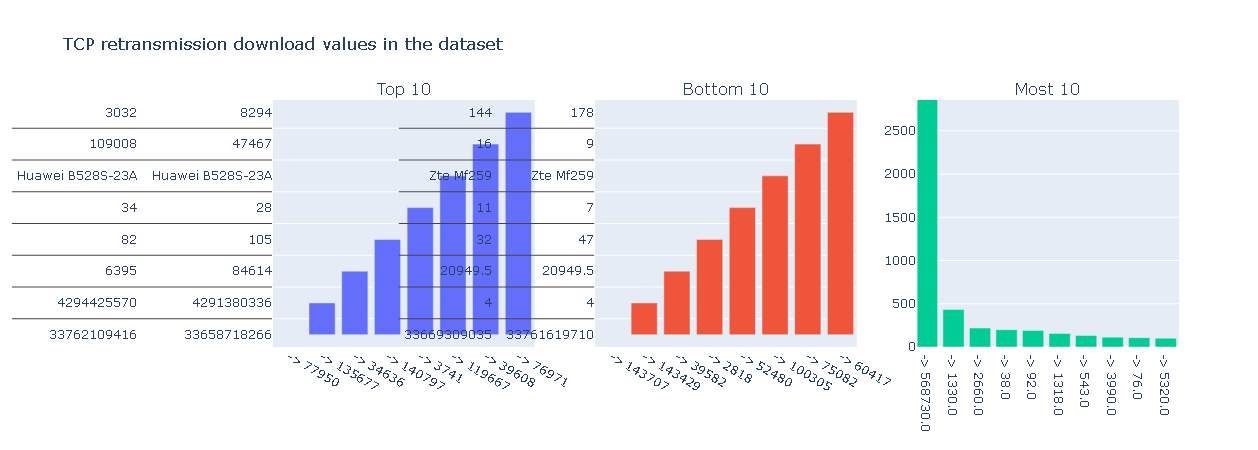

In [77]:
# this is just for git hub, to display the plot on git hub
Image(filename='../plots/tcp_dl.png')

In [62]:
plotly_multi_hist([top_10_ul, bot_10_ul, freq_10_ul], 1, 3, "TCP retransmission upload values in the dataset", ['Top 10', 'Bottom 10', 'Most 10'])

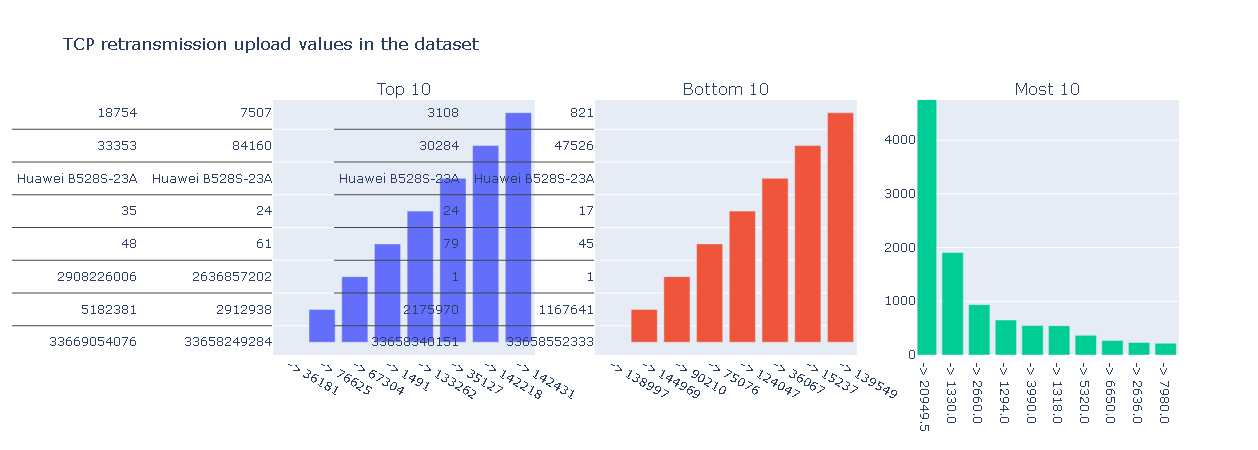

In [76]:
# this is just for git hub, to display the plot on git hub
Image(filename='../plots/tcp_ul.png')

* RTT values in the dataset

In [63]:
rtt_dl = user_experience_df.sort_values('Avg RTT DL (ms)', ascending=False)
rtt_ul = user_experience_df.sort_values('Avg RTT UL (ms)', ascending=False)

top_10_dl = rtt_dl.head(10)
bot_10_dl = rtt_dl.tail(10)
freq_10_dl = rtt_dl['Avg RTT DL (ms)'].value_counts().head(10)

top_10_ul = rtt_ul.head(10)
bot_10_ul = rtt_ul.tail(10)
freq_10_ul = rtt_ul['Avg RTT UL (ms)'].value_counts().head(10)

In [64]:
plotly_multi_hist([top_10_dl, bot_10_dl, freq_10_dl], 1, 3, "RTT download values in the dataset", ['Top 10', 'Bottom 10', 'Most 10'])

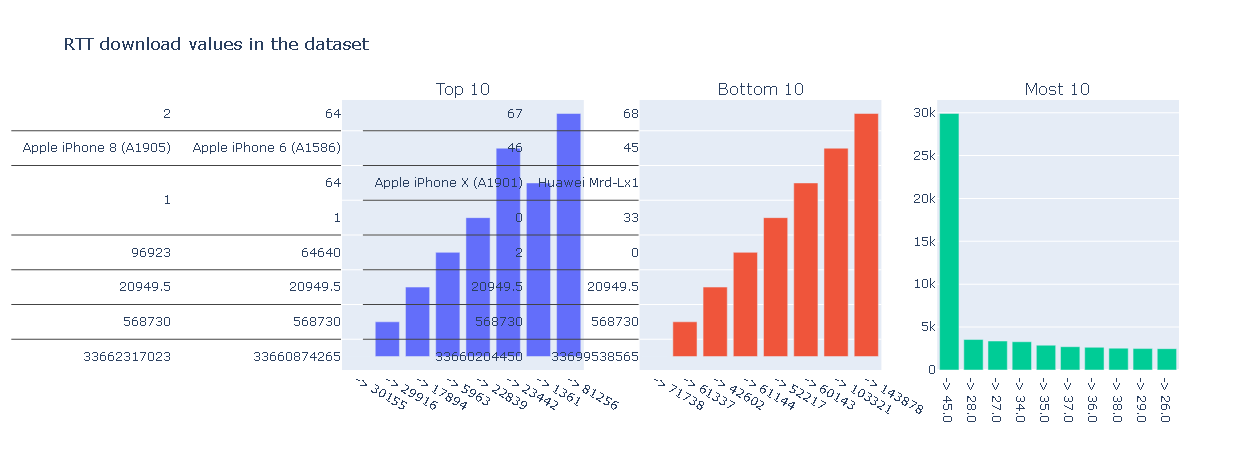

In [75]:
# this is just for git hub, to display the plot on git hub
Image(filename='../plots/rtt_dl.png')

In [65]:
plotly_multi_hist([top_10_ul, bot_10_ul, freq_10_ul], 1, 3, "RTT upload values in the dataset", ['Top 10', 'Bottom 10', 'Most 10'])

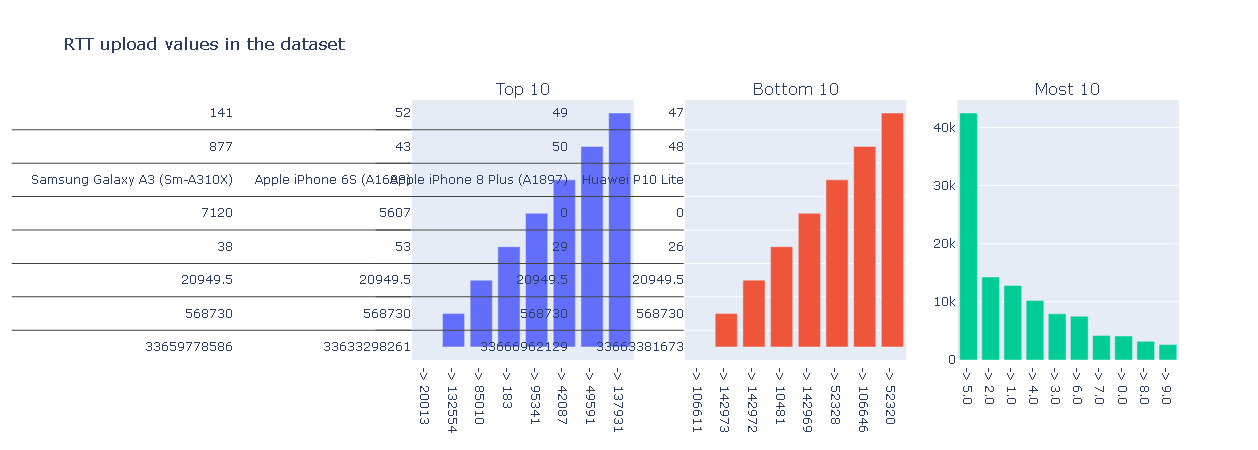

In [74]:
# this is just for git hub, to display the plot on git hub
Image(filename='../plots/rtt_ul.png')

* Throughput values in the dataset

In [66]:
through_put_dl = user_experience_df.sort_values('Avg Bearer TP DL (kbps)', ascending=False)
through_put_ul = user_experience_df.sort_values('Avg Bearer TP UL (kbps)', ascending=False)

top_10_dl = through_put_dl.head(10)
bot_10_dl = through_put_dl.tail(10)
freq_10_dl = through_put_dl['Avg Bearer TP DL (kbps)'].value_counts().head(10)

top_10_ul = through_put_ul.head(10)
bot_10_ul = through_put_ul.tail(10)
freq_10_ul = through_put_ul['Avg Bearer TP UL (kbps)'].value_counts().head(10)

In [67]:
plotly_multi_hist([top_10_dl, bot_10_dl, freq_10_dl], 1, 3, "Through put download values in the dataset", ['Top 10', 'Bottom 10', 'Most 10'])

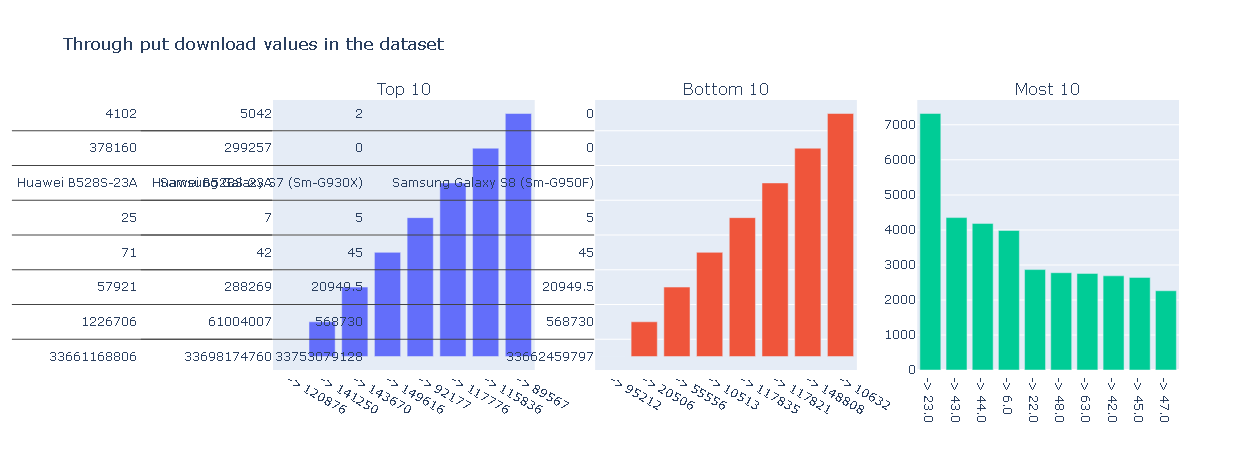

In [73]:
# this is just for git hub, to display the plot on git hub
Image(filename='../plots/thro_put_dl.png')

In [68]:
plotly_multi_hist([top_10_ul, bot_10_ul, freq_10_ul], 1, 3, "Through put upload values in the dataset", ['Top 10', 'Bottom 10', 'Most 10'])

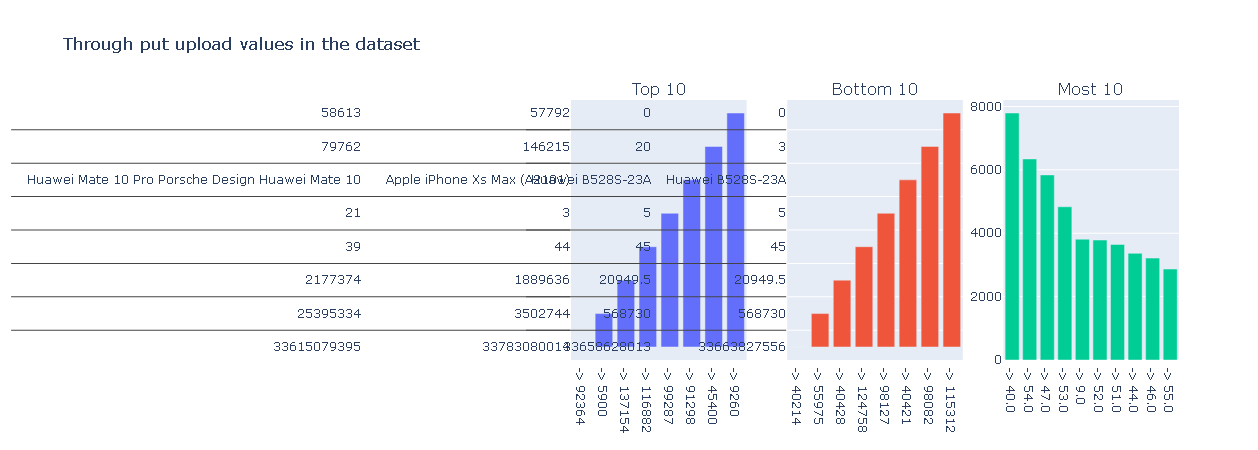

In [72]:
# this is just for git hub, to display the plot on git hub
Image(filename='../plots/thro_put_ul.png')

### Compute & report on handset types

In [79]:
handset_type_df = user_experience_df.groupby('Handset Type').mean()
handset_type_df

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
Handset Type,,,,,,,
A-Link Telecom I. Cubot A5,3.377002e+10,568730.0,20949.5,40.0,2.0,23184.0,326.0
A-Link Telecom I. Cubot Note Plus,3.366728e+10,602349.0,13864.0,1581.0,8.0,6527.0,172.0
A-Link Telecom I. Cubot Note S,3.364106e+10,41344479.0,67252.0,886.0,4.0,8515.0,422.0
A-Link Telecom I. Cubot Nova,3.362357e+10,135840.0,1330.0,40.0,4.0,55667.0,550.0
A-Link Telecom I. Cubot Power,3.367833e+10,7799.0,242.0,39.0,4.0,69126.0,342.0
...,...,...,...,...,...,...,...
Zte Starxtrem By Sfr,3.360905e+10,568730.0,51605.0,45.0,5.0,0.0,888.0
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,3.364429e+10,285695.0,20949.5,124.0,3.0,44.5,13.5
Zyxel Communicat. Lte7460,3.366226e+10,23843031.0,17433515.0,87.0,46.0,39741.0,22215.0


* Distribution of the average throughput  per handset type

In [89]:
# sorting per throughput download
tp_dl = handset_type_df.sort_values(
    'Avg Bearer TP DL (kbps)', ascending=False)
tp_dl.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
Handset Type,,,,,,,
New-Bund Technol. Mix 2,3.367653e+10,1.120718e+07,9310.000000,119.000000,28.000000,104669.000000,542.000000
Lg G6+,3.366849e+10,2.706326e+07,16211.000000,44.000000,9.000000,97747.000000,2388.000000
Huawei B715S-23C,3.370512e+10,3.360442e+07,809164.730769,65.230769,52.923077,92075.692308,16918.538462
Huawei Y9 2019,3.366994e+10,5.687300e+05,17239.000000,52.000000,24.000000,90557.000000,1182.000000
Spa Condor Elect. Allure M2,3.364949e+10,4.428600e+04,222.000000,38.500000,6.500000,83294.500000,1017.000000


In [85]:
# sorting per throughput upload
tp_ul = handset_type_df.sort_values(
    'Avg Bearer TP UL (kbps)', ascending=False)
tp_ul.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
Handset Type,,,,,,,
Sierra Wireless Mc7710,3.372899e+10,210577.0,5.334472e+05,31.333333,224.0,643.666667,27889.666667
Lg Lg-H818P,3.376044e+10,1865530.0,3.121240e+05,49.000000,158.0,40679.000000,23577.000000
Xiaomi Communica. M1803E1A,3.366277e+10,102166.0,7.541000e+03,25.000000,20.0,49172.000000,23493.000000
Zyxel Communicat. Lte7460,3.366226e+10,23843031.0,1.743352e+07,87.000000,46.0,39741.000000,22215.000000
Oppo Cph1701,3.365059e+10,1010596.0,1.426300e+04,53.000000,9.0,50566.000000,19398.000000


* average TCP retransmission view per handset type

In [90]:
# sorting per tcp retransmission download 
tcp = handset_type_df.sort_values(
    'TCP DL Retrans. Vol (Bytes)', ascending=False)
tcp.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
Handset Type,,,,,,,
Lg Lg-H635,3.370893e+10,9.050423e+08,20949.5,53.333333,27.0,24458.666667,880.333333
Huawei Bln-Al10,3.366665e+10,3.290646e+08,110023.0,160.000000,132.0,4626.000000,1135.000000
Asustek Asus Zenfone Selfie Zd551Kl,3.371968e+10,3.189534e+08,2704945.0,89.000000,32.5,21097.500000,6487.500000
Samsung Galaxy Tab S3 (Sm-T825),3.367510e+10,2.026297e+08,18819.9,85.800000,11.4,26911.200000,864.800000
Huawei E5776S-32,3.367053e+10,1.639437e+08,689658.9,113.600000,22.2,22915.200000,2342.800000


In [92]:
# sorting per tcp retransmission upload 
tcp = handset_type_df.sort_values(
    'TCP UL Retrans. Vol (Bytes)', ascending=False)
tcp.head()

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
Handset Type,,,,,,,
Zyxel Communicat. Lte7460,3.366226e+10,23843031.0,17433515.0,87.0,46.0,39741.0,22215.0
Huawei Y7 Prime 2018,3.371028e+10,52527269.5,12776958.5,44.0,21.0,18392.0,956.5
Zyxel Communicat. Sbg3600,3.366811e+10,50200837.0,3286101.0,92.0,81.0,82818.0,14533.0
Asustek Wireless-Ac1200 Lte Router,3.365464e+10,533189.4,3094332.9,67.8,15.0,37201.8,13008.2
Asustek Asus Zenfone Selfie Zd551Kl,3.371968e+10,318953361.0,2704945.0,89.0,32.5,21097.5,6487.5


###  Using the experience metrics above, perform a k-means clustering (where k = 3)